In [1]:
import pandas as pd # Data processing
import numpy as np # Numerical python i.e Linear Algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # Stastical Visualization

In [2]:
# import the Data
uber_data= pd.read_csv(r"C:\Users\sridh\Documents\projects\uber analysis\uber-raw-data-apr14.csv")
uber_data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [3]:
# checking the null values
uber_data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [4]:
# checking the Datatypes information in the given dataset
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [5]:
#checking the Stats information
uber_data.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [6]:
#Convert the datatype of the Date/Time from object to Datetime and creating the minute, hour, day and dayname
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['Weekday_name'] = uber_data['Date/Time'].dt.day_name()
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour
uber_data['MinuteOfDay'] = uber_data['Date/Time'].dt.minute
uber_data

,Date/Time,Lat,Lon,Base,Weekday_name,MonthDayNum,HourOfDay,MinuteOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,0,33
...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30,23,22
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30,23,26
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30,23,31
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30,23,32


In [7]:
#datatype object changed to datetime64
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date/Time     564516 non-null  datetime64[ns]
 1   Lat           564516 non-null  float64       
 2   Lon           564516 non-null  float64       
 3   Base          564516 non-null  object        
 4   Weekday_name  564516 non-null  object        
 5   MonthDayNum   564516 non-null  int64         
 6   HourOfDay     564516 non-null  int64         
 7   MinuteOfDay   564516 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 34.5+ MB


In [8]:
weekday= uber_data.pivot_table( index=['Weekday_name'], values= 'Base', aggfunc='count' )
weekday

,Base
Weekday_name,
Friday,90303
Monday,60861
Saturday,77218
Sunday,51251
Thursday,85067
Tuesday,91185
Wednesday,108631


<AxesSubplot:xlabel='Weekday_name'>

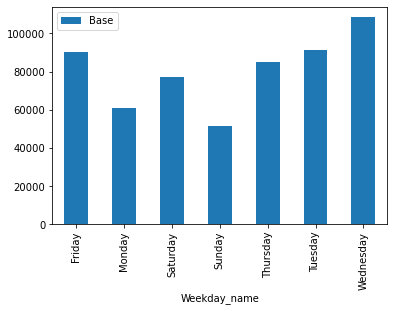

In [9]:
weekday.plot(kind='bar')

In [10]:
weekday_avg= round(weekday/30,2)
weekday_avg

,Base
Weekday_name,
Friday,3010.10
Monday,2028.70
Saturday,2573.93
Sunday,1708.37
Thursday,2835.57
Tuesday,3039.50
Wednesday,3621.03


<AxesSubplot:xlabel='Weekday_name'>

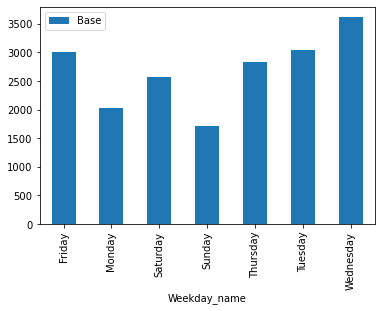

In [11]:
weekday_avg.plot(kind= 'bar')

In [12]:
hours= uber_data.pivot_table(index=['HourOfDay'], values= 'Base', aggfunc='count')
hours

,Base
HourOfDay,
0,11910
1,7769
2,4935
3,5040
4,6095
5,9476
6,18498
7,24924
8,22843


Text(0.5, 1.0, 'Rides per Hour')

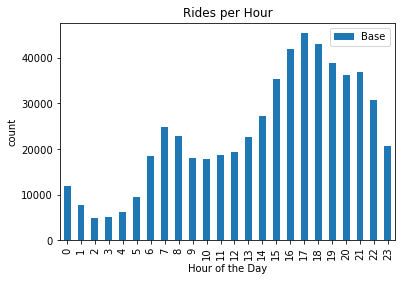

In [13]:
hours.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel( 'count')
plt.title('Rides per Hour')